# Part 1: WeatherPy 
## Instructions
This activity is broken down into two deliverables, WeatherPy and VacationPy.

In this deliverable, you'll create a Python script to visualize the weather of over 500 cities of varying distances from the equator. You'll use the citipy Python libraryLinks to an external site., the OpenWeatherMap APILinks to an external site., and your problem-solving skills to create a representative model of weather across cities.

For this part, you'll use the WeatherPy.ipynb Jupyter notebook provided in the starter code which will guide you through the process of using your Python coding skills to develop a solution to address the required functionalities.

To get started, the code required to generate random geographic coordinates and the nearest city to each latitude and longitude combination is provided.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 577


In [4]:
# Perform a weather check on each city using a series of successive API calls
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Create counters
record_count = 1
set_count = 1

# Print to logger.
print("Beginning Data Retrieval")
print('-'*24)

# Loop through all the cities in our list to fetch weather data.
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
    
    # Create endpoint URL with each city
    city_url = f"{url}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1
    
    # Try statement to append calls where values are found.
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_name = (city_weather['name'])
        city_lat = (city_weather['coord']['lat'])
        city_lng = (city_weather['coord']['lon'])
        city_max_temp = (city_weather['main']['temp_max'])
        city_humidity = (city_weather['main']['humidity'])
        city_clouds = (city_weather['clouds']['all'])
        city_wind = (city_weather['wind']['speed'])
        city_country = (city_weather['sys']['country'])
        city_date = (city_weather['dt'])

        # Append the City information into city_data list
        #response = requests.get(f'{url}&q={cities}').json()
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
       
    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("---------------------------")
print("| Data Retrieval Complete |")
print("---------------------------")

Beginning Data Retrieval
------------------------
Processing Record 1 of Set 1 | boryeong
Processing Record 2 of Set 1 | avarua
Processing Record 3 of Set 1 | iqaluit
Processing Record 4 of Set 1 | kyzyl-suu
Processing Record 5 of Set 1 | dudinka
Processing Record 6 of Set 1 | severo-yeniseyskiy
Processing Record 7 of Set 1 | margaret river
Processing Record 8 of Set 1 | dinga
Processing Record 9 of Set 1 | isafjordur
Processing Record 10 of Set 1 | tarawa
Processing Record 11 of Set 1 | blackmans bay
Processing Record 12 of Set 1 | edinburgh of the seven seas
Processing Record 13 of Set 1 | grytviken
Processing Record 14 of Set 1 | gourcy
Processing Record 15 of Set 1 | hawaiian paradise park
Processing Record 16 of Set 1 | bethel
Processing Record 17 of Set 1 | timbuktu
Processing Record 18 of Set 1 | tura
Processing Record 19 of Set 1 | adamstown
Processing Record 20 of Set 1 | waitangi
Processing Record 21 of Set 1 | coahuayana de hidalgo
Processing Record 22 of Set 1 | camana
Proc

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Convert unix timestamp to standard timestamp
city_data_df['Date'] = pd.to_datetime(city_data_df['Date'], unit='s')

# Show Record Count
city_data_df.count()

City          555
Lat           555
Lng           555
Max Temp      555
Humidity      555
Cloudiness    555
Wind Speed    555
Country       555
Date          555
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,boryeong,36.3493,126.5977,42.76,67,56,6.73,KR,1706711738
1,avarua,-21.2078,-159.7750,73.45,94,93,1.14,CK,1706711738
2,iqaluit,63.7506,-68.5145,-31.27,59,20,24.16,CA,1706711738
3,kyzyl-suu,42.3414,78.0056,21.78,75,100,7.27,KG,1706711739
4,dudinka,69.4058,86.1778,-4.32,84,80,21.00,RU,1706711545


In [42]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [43]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Make a datestamp variable to put in title of charts
date = city_data_df['Date'].min()

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,boryeong,36.3493,126.5977,42.76,67,56,6.73,KR,1706711738
1,avarua,-21.2078,-159.7750,73.45,94,93,1.14,CK,1706711738
2,iqaluit,63.7506,-68.5145,-31.27,59,20,24.16,CA,1706711738
3,kyzyl-suu,42.3414,78.0056,21.78,75,100,7.27,KG,1706711739
4,dudinka,69.4058,86.1778,-4.32,84,80,21.00,RU,1706711545


## Latitude vs. Temperature

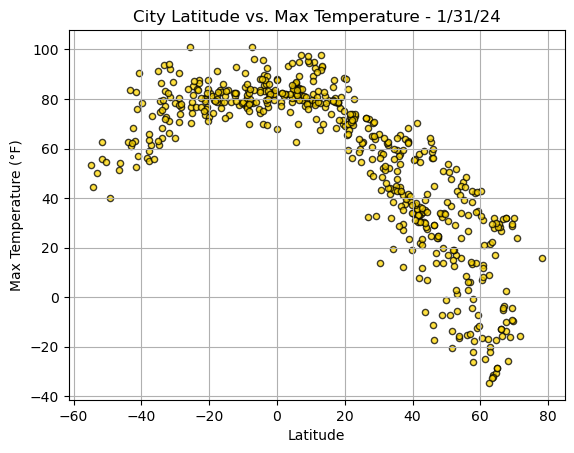

In [44]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], marker='o', s=20, c='gold', edgecolors='black', alpha=.75)

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Max Temperature ({date})')
plt.ylabel('Max Temperature (\N{DEGREE SIGN}F)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

## Latitude vs. Humidity

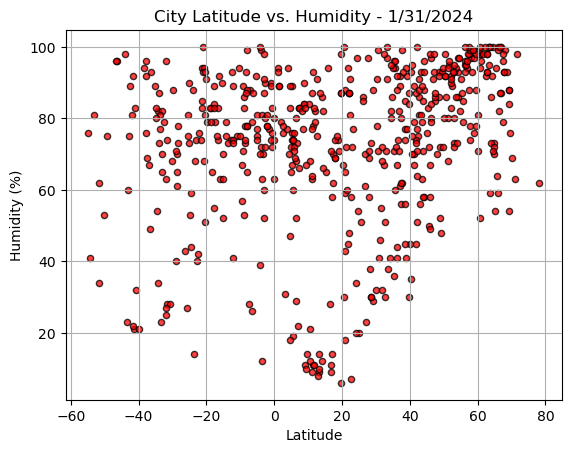

In [45]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], marker='o', s=20, c='r', edgecolors='black', alpha=.75)

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Humidity ({date})')
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

## Latitude vs. Cloudiness Plot

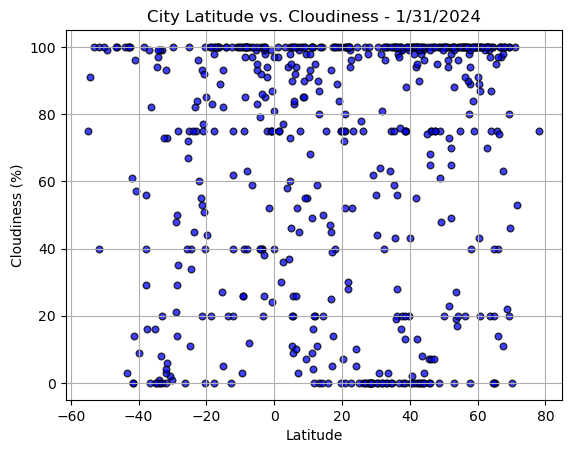

In [46]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], marker='o', s=23, c='b', edgecolors='black', alpha=.75)

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Cloudiness ({date})')
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

## Latitude vs. Wind Speed

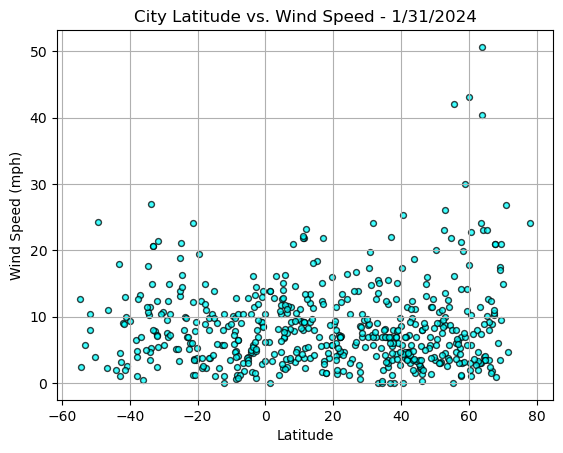

In [47]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], marker = 'o', s = 18, c='cyan', edgecolors = 'black', alpha = .75)

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Wind Speed ({date})')
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

## Requirement 2: Compute Linear Regression for Each Relationship

In [48]:
# Define a function to create Linear Regression plots

def linear_regression_plot(x, y, x_label, y_label, title):
    

    # Perform linear regression
    slope, intercept, r_value, pvalue, stderr = st.linregress(x, y)
   
    # Create the regression line and its equation
    regression_line = slope * x + intercept
    line_eq = f"y = {round(slope, 2)} x + {round(intercept, 2)}"
    r_squared = r_value ** 2
    r_squared_rounded = f"r^2 = {(round(r_squared, 4))}"
    
    # Plot the regression line
    plt.scatter(x, y, color='royalblue')
    plt.plot(x, regression_line, color='red')
    
    # Annotate the regression line and coefficient of determination
    plt.annotate(f"{line_eq}\n    {r_squared_rounded}", (min(x) + 10,min(y) + 10), fontsize=15, color="red")
    
    # Add labels and title
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    print(f'The r-value is: {r_value}')
    print(f'{line_eq}')
    print(f'{r_squared_rounded}')
   

In [49]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,boryeong,36.3493,126.5977,42.76,67,56,6.73,KR,1706711738
2,iqaluit,63.7506,-68.5145,-31.27,59,20,24.16,CA,1706711738
3,kyzyl-suu,42.3414,78.0056,21.78,75,100,7.27,KG,1706711739
4,dudinka,69.4058,86.1778,-4.32,84,80,21.00,RU,1706711545
5,severo-yeniseyskiy,60.3725,93.0408,-16.42,98,43,3.00,RU,1706711739


In [50]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,avarua,-21.2078,-159.7750,73.45,94,93,1.14,CK,1706711738
6,margaret river,-33.9500,115.0667,64.35,87,1,11.50,AU,1706711739
10,blackmans bay,-43.0167,147.3167,60.93,60,100,1.01,AU,1706711740
11,edinburgh of the seven seas,-37.0676,-12.3116,61.41,67,99,13.27,SH,1706711741
12,grytviken,-54.2811,-36.5092,44.44,41,91,2.44,GS,1706711741


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8602868924581648
y = -1.42 x + 96.17
r^2 = 0.7401


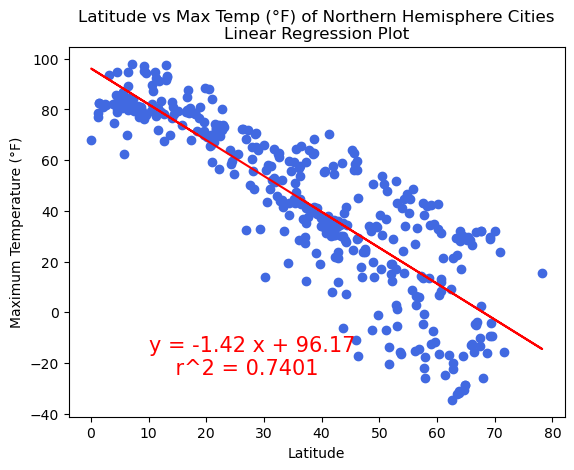

In [51]:
# Linear regression on Northern Hemisphere
linear_regression_plot(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], 'Latitude', 'Maximum Temperature (\N{DEGREE SIGN}F)', 'Latitude vs Max Temp (\N{DEGREE SIGN}F) of Northern Hemisphere Cities\nLinear Regression Plot')

The r-value is: 0.60731435357198
y = 0.45 x + 86.91
r^2 = 0.3688


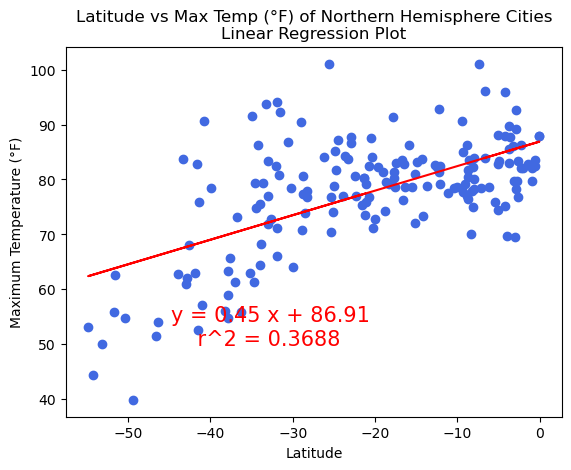

In [52]:
# Linear regression on Southern Hemisphere
linear_regression_plot(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], 'Latitude', 'Maximum Temperature (\N{DEGREE SIGN}F)', 'Latitude vs Max Temp (\N{DEGREE SIGN}F) of Northern Hemisphere Cities\nLinear Regression Plot')

**Discussion about the linear relationship:** 

The linear regression lines in the two maximum temperature vs latitude charts show  moderate correlations which means that there is a connection of higher maximum temperatures recorded in cities that are closer to the equator and lower maximum temperatures recorded in cities that are closer to the poles.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.40641798318798983
y = 0.48 x + 56.21
r^2 = 0.1652


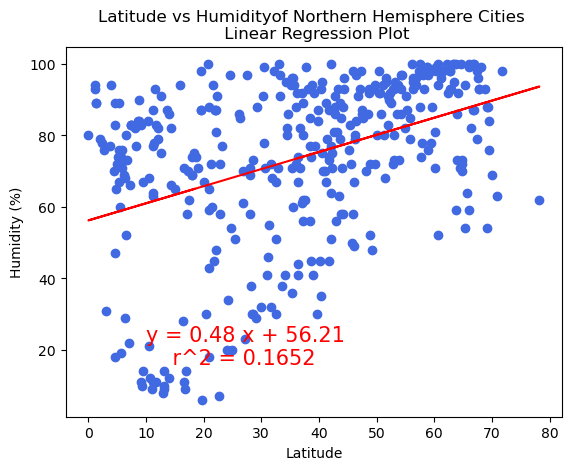

In [53]:
# Northern Hemisphere
# Linear regression on Northern Hemisphere
linear_regression_plot(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], 'Latitude', 'Humidity (%)', 'Latitude vs Humidityof Northern Hemisphere Cities \n Linear Regression Plot')

The r-value is: 0.19593495428913066
y = 0.28 x + 77.03
r^2 = 0.0384


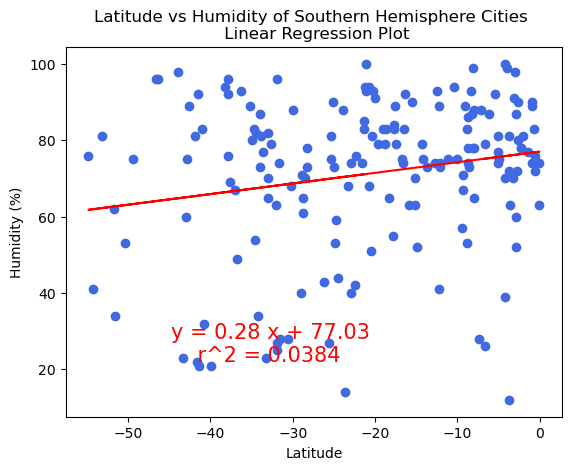

In [54]:
# Southern Hemisphere
# Linear regression on Northern Hemisphere
linear_regression_plot(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], 'Latitude', 'Humidity (%)', 'Latitude vs Humidity of Southern Hemisphere Cities \n Linear Regression Plot')

**Discussion about the linear relationship:** 

The linear regression lines are both very flat in the two Humidity vs latitude charts meaning that there is no correlation between how far cities are from the equator and the percentage of relative humidity in those cities. This is most likely due to large arid continental landmasses along with temperate and muggy regions being equally distributed throughout Earth.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.1215133896335543
y = 0.24 x + 57.34
r^2 = 0.0148


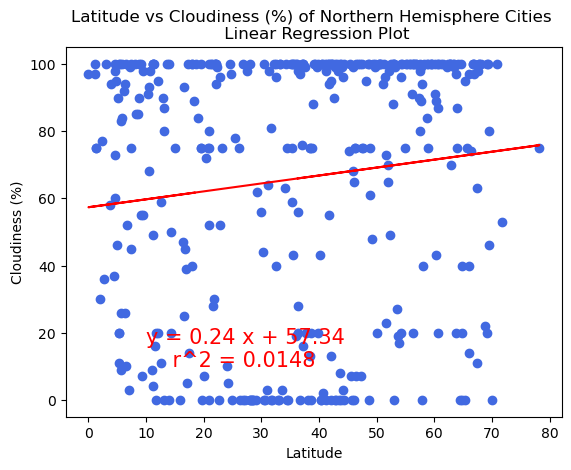

In [55]:
# Northern Hemisphere
linear_regression_plot(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], 'Latitude', 'Cloudiness (%)', 'Latitude vs Cloudiness (%) of Northern Hemisphere Cities \n Linear Regression Plot')

The r-value is: 0.18743579399956733
y = 0.48 x + 73.35
r^2 = 0.0351


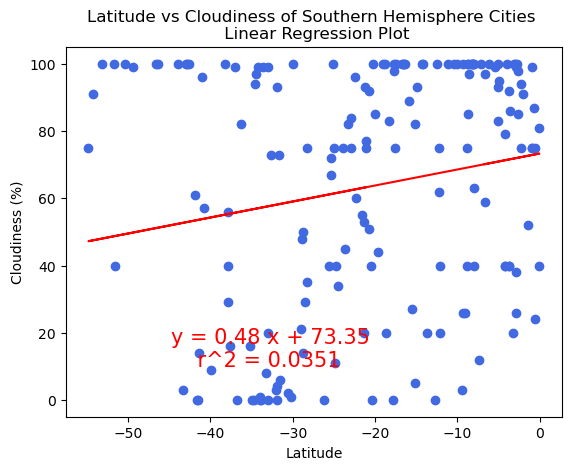

In [56]:
# Southern Hemisphere
linear_regression_plot(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], 'Latitude', 'Cloudiness (%)', 'Latitude vs Cloudiness of Southern Hemisphere Cities \n Linear Regression Plot')

**Discussion about the linear relationship:** 

The linear regression lines are both flat in the two cloudiness vs latitude charts meaning that there is no correlation between how far cities are from the equator and the level of overcast recorded in those cities mostly due to the fact that the majority of places experience 100% cloudiness from stormy weather or 0% cloudiness from clear skies.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.08780372551543943
y = 0.03 x + 7.49
r^2 = 0.0077


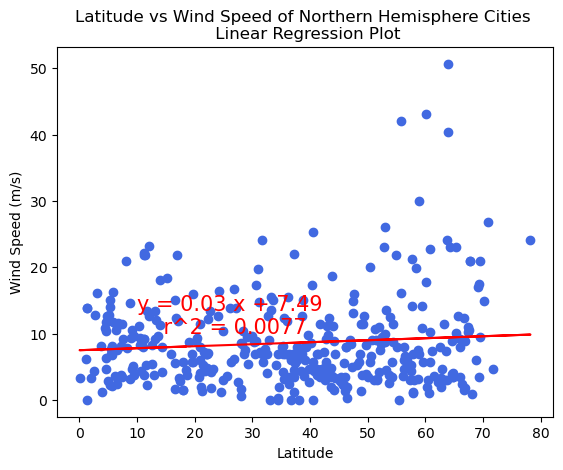

In [57]:
# Northern Hemisphere
linear_regression_plot(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], 'Latitude', 'Wind Speed (m/s)', 'Latitude vs Wind Speed of Northern Hemisphere Cities \n Linear Regression Plot')

The r-value is: -0.15156848761031777
y = -0.06 x + 6.8
r^2 = 0.023


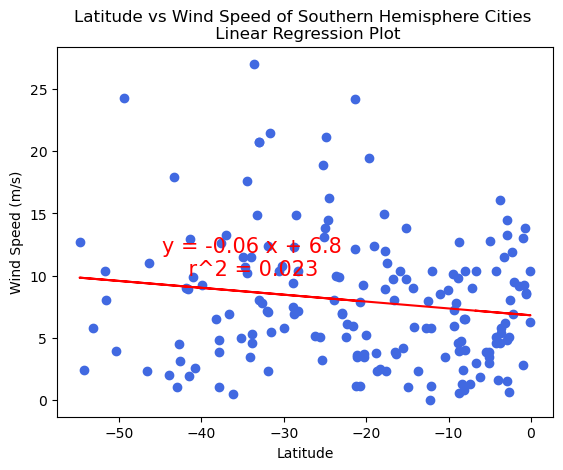

In [58]:
# Southern Hemisphere
linear_regression_plot(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], 'Latitude', 'Wind Speed (m/s)', 'Latitude vs Wind Speed of Southern Hemisphere Cities \n Linear Regression Plot')

**Discussion about the linear relationship:** 

The linear regression lines are both very flat in the two wind speed vs latitude charts meaning that there is no correlation between how far cities are from the equator and the amount of wind recorded in those cities.